In [179]:
import pandas as pd

In [180]:
df = pd.read_csv('dataset.csv')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


# We gonna use 5 algorithms they are LinearRegression, DT, RF, SVM, KNN

In [182]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [183]:
def FillMissingValues(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)

In [184]:
def Encoder(df):
    encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = encoder.fit_transform(df[col])
    return df

In [185]:
def Scaler(df):
    scaler = MinMaxScaler()
    num_col = df.select_dtypes(include=['float64', 'int64']).columns.drop('Salary')
    df[num_col] = scaler.fit_transform(df[num_col])
    return df

In [186]:
FillMissingValues(df)
df = Encoder(df)
df = Scaler(df)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       10000 non-null  float64
 1   Name              10000 non-null  float64
 2   Age               10000 non-null  float64
 3   Gender            10000 non-null  float64
 4   Department        10000 non-null  float64
 5   Job_Title         10000 non-null  float64
 6   Experience_Years  10000 non-null  float64
 7   Education_Level   10000 non-null  float64
 8   Location          10000 non-null  float64
 9   Salary            10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [188]:
df.head(20)

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,0.0000,0.690382,0.076923,0.0,0.0,0.25,0.027027,0.5,0.00,90000
1,0.0001,0.477754,0.897436,1.0,1.0,0.50,0.891892,0.5,1.00,195000
2,0.0002,0.122530,0.000000,1.0,0.0,0.75,0.027027,0.0,0.50,35000
3,0.0003,0.693423,0.230769,1.0,0.2,0.00,0.243243,0.0,0.50,75000
4,0.0004,0.761427,0.102564,0.0,0.4,0.00,0.054054,0.5,1.00,70000
5,0.0005,0.698186,0.358974,1.0,0.2,1.00,0.216216,1.0,0.50,125000
6,0.0006,0.628965,0.051282,0.0,0.6,0.00,0.054054,0.0,0.75,60000
7,0.0007,0.347421,0.666667,0.0,0.6,1.00,0.648649,0.5,0.75,145000
8,0.0008,0.972028,0.564103,1.0,0.6,1.00,0.432432,1.0,0.75,135000
9,0.0009,0.956623,0.051282,0.0,0.6,0.00,0.000000,0.5,0.75,70000


# train/test split

In [189]:
from sklearn.model_selection import train_test_split

x = df.drop('Salary', axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Metrics

In [190]:
from sklearn.metrics import r2_score, mean_absolute_error

# LinearRegression

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lr = LinearRegression()

In [193]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [194]:
y_pred = lr.predict(x_test)

In [195]:
lr_score = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

In [196]:
lr_score

0.8974177418548852

In [197]:
lr_mae

11535.578927744104

# Decision Tree

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
dt = DecisionTreeRegressor()

In [200]:
dt.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [201]:
y_pred = dt.predict(x_test)

In [202]:
dt_score = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)

In [203]:
dt_score

0.9813715386449877

In [204]:
dt_mae

4702.5

# Random Forest

In [205]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [206]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [207]:
y_pred = rf.predict(x_test)

In [208]:
rf_score = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

In [209]:
rf_score

0.9903539027793412

In [210]:
rf_mae

3605.3

# SVM (Support Vector Machine)

In [211]:
from sklearn.svm import SVR

In [212]:
svr = SVR(kernel='linear', C=50.0)

In [213]:
svr.fit(x_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,50.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [214]:
y_pred = svr.predict(x_test)

In [215]:
svm_score = r2_score(y_test, y_pred)
svm_mae = mean_absolute_error(y_test, y_pred)

In [216]:
svm_score

0.7602564338057719

In [217]:
svm_mae

15071.12868573619

# KNN

In [218]:
from sklearn.neighbors import KNeighborsRegressor

In [219]:
knn = KNeighborsRegressor(n_neighbors=5)

In [220]:
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [221]:
y_pred = knn.predict(x_test)

In [222]:
knn_score = r2_score(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)

In [223]:
knn_score

0.9783722436827283

In [224]:
knn_mae

4902.0

# Tabulate

In [225]:
from tabulate import tabulate

In [226]:
result = [
    ['Linear Regression', lr_score, lr_mae],
    ['Decision Tree', dt_score, dt_mae],
    ['Random Forest', rf_score, rf_mae],
    ['Support Vector Regressor', svm_score, svm_mae],
    ['K-Nearest Neighbors', knn_score, knn_mae]
]

headers = ['algorithm', 'r2_score', 'mean_absolute_error']

table = tabulate(result, headers=headers, tablefmt='grid', floatfmt='.3f')

In [227]:
print(table)

+--------------------------+------------+-----------------------+
| algorithm                |   r2_score |   mean_absolute_error |
+==========================+============+=======================+
| Linear Regression        |      0.897 |             11535.579 |
+--------------------------+------------+-----------------------+
| Decision Tree            |      0.981 |              4702.500 |
+--------------------------+------------+-----------------------+
| Random Forest            |      0.990 |              3605.300 |
+--------------------------+------------+-----------------------+
| Support Vector Regressor |      0.760 |             15071.129 |
+--------------------------+------------+-----------------------+
| K-Nearest Neighbors      |      0.978 |              4902.000 |
+--------------------------+------------+-----------------------+


# Matplotlib

In [228]:
import matplotlib.pyplot as plt

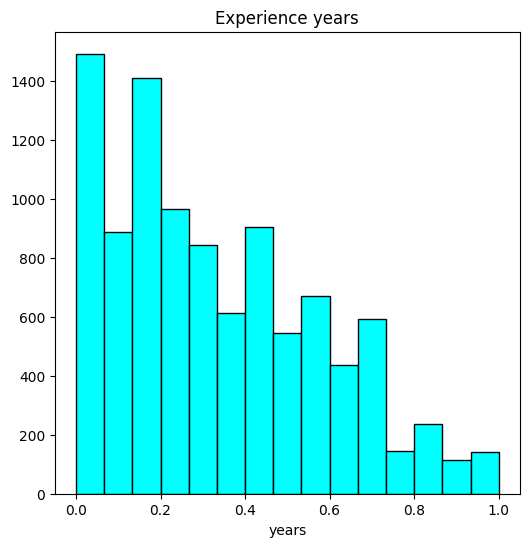

In [229]:
plt.figure(figsize=(6, 6))
plt.hist(df['Experience_Years'], bins=15, color='aqua', edgecolor='black')
plt.title('Experience years')
plt.xlabel('years')
plt.show()

# Seaborn

In [230]:
import seaborn as sns

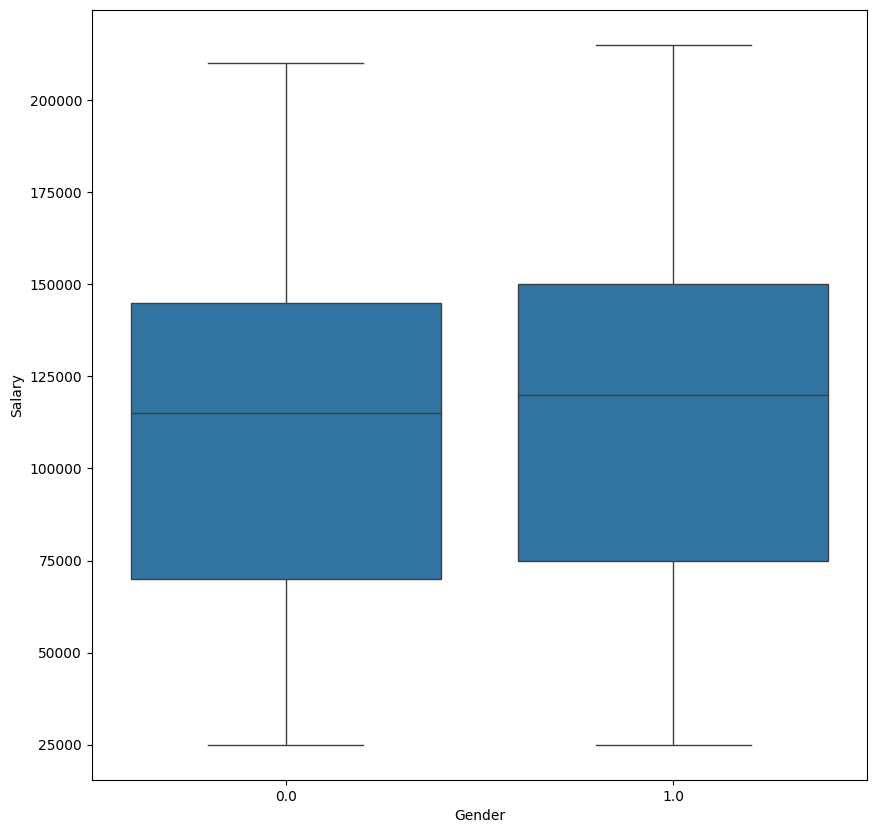

In [235]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='Salary',data=df)
plt.show()

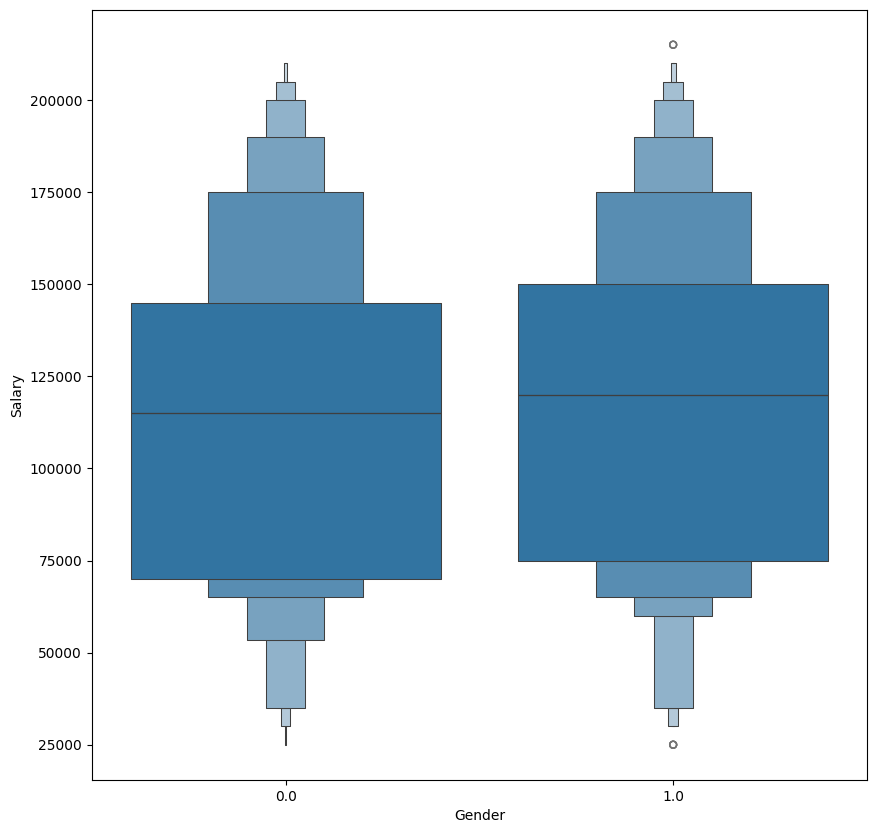

In [237]:
plt.figure(figsize=(10, 10))
sns.boxenplot(x='Gender', y='Salary',data=df)
plt.show()

# Plotly express

In [238]:
import plotly.express as px

In [243]:
fig = px.scatter(df, x='Age', y='Experience_Years', color='Salary', size='Age', hover_data=['Gender', 'Experience_Years'])
fig.show()